<a href="https://colab.research.google.com/github/Susheel06/mask_detection/blob/main/Mask_detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!git clone https://github.com/prajnasb/observations.git
import numpy as np

fatal: destination path 'observations' already exists and is not an empty directory.


In [99]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [100]:
BATCH_SIZE = 32

trainGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1/255.,
    validation_split = 0.2,
)

train_gen = trainGen.flow_from_directory(
    '/content/observations/experiements/data',
    target_size=(128, 128),
    classes=['with_mask','without_mask'],
    class_mode='categorical', 
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)
 
validation_gen = trainGen.flow_from_directory(
    '/content/observations/experiements/data', 
    target_size=(128, 128),
    classes=['with_mask','without_mask'],
    class_mode='categorical', 
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=True
)

testGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1/255.,
    validation_split = 0.2,
)
 
test = testGen.flow_from_directory(
    '/content/observations/experiements/dest_folder/test', 
    target_size=(128, 128), 
    classes=['with_mask','without_mask'],
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True,
)

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [101]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_11 (Flatten)         (None, 20480)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 40962     
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


In [102]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
history = model.fit_generator(generator=train_gen,steps_per_epoch=len(train_gen)//32,epochs=20,validation_data=validation_gen,validation_steps=len(validation_gen)//32, verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 2.0247 - accuracy: 0.1250
Epoch 2/20
1/1 [==============================] - 1s 626ms/step - loss: 2.0160 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 650ms/step - loss: 0.0678 - accuracy: 0.9688
Epoch 4/20
1/1 [==============================] - 1s 628ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 641ms/step - loss: 0.0648 - accuracy: 0.9688
Epoch 6/20
1/1 [==============================] - 1s 837ms/step - loss: 0.2489 - accuracy: 0.9062
Epoch 7/20
1/1 [==============================] - 1s 621ms/step - loss: 0.4166 - accuracy: 0.9062
Epoch 8/20
1/1 [==============================] - 1s 631ms/step - loss: 0.0996 - accuracy: 0.9688
Epoch 9/20
1/1 [==============================] - 1s 635ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 849ms/step - loss: 0.0253 - accuracy: 0.9688
Epoch 11/20
1/1 [=====

array([[1.0000000e+00, 3.9228283e-09]], dtype=float32)

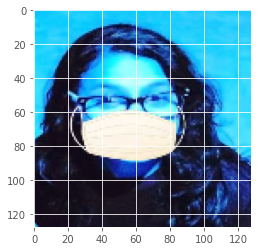

In [103]:
sample_mask_img = cv2.imread('/content/observations/experiements/data/with_mask/109-with-mask.jpg')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

model.predict(sample_mask_img)

In [104]:
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.23066890239715576, 0.9742268323898315]

In [105]:
model.save('masknet.h5')